# Análisis de Datos

En este cuaderno de Jupyter, realizaremos un análisis exhaustivo de los datos obtenidos. La primera etapa del análisis se enfocará en examinar y explorar los datos para comprender su estructura, calidad y características principales.

## Objetivos del Análisis

1. **Revisión de los Datos**: Inspeccionaremos las primeras filas de los datos para obtener una vista general.
2. **Análisis Estadístico**: Calcularemos estadísticas descriptivas para identificar tendencias y patrones.
3. **Limpieza de Datos**: Identificaremos y abordaremos cualquier problema con los datos, como valores nulos o inconsistencias.
4. **Visualización Inicial**: Crearemos gráficos y visualizaciones para representar los datos de manera más intuitiva.


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo
from Funciones import *
import dtale

In [2]:
os.chdir("C:/Users/daric/OneDrive/Desktop/TFM/tfm_predictive_maintenance/data")

In [3]:
test_df=pd.read_csv("test_df.csv")
train_df=pd.read_csv("train_df.csv")

In [4]:
print(test_df.dtypes)
print(train_df.dtypes)

id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18           int64
s19         float64
s20         float64
s21         float64
RUL           int64
dtype: object
id            int64
cycle         int64
setting1    float64
setting2    float64
setting3    float64
s1          float64
s2          float64
s3          float64
s4          float64
s5          float64
s6          float64
s7          float64
s8          float64
s9          float64
s10         float64
s11         float64
s12         float64
s13         float64
s14         float64
s15         float64
s16         float64
s17           int64
s18   

In [5]:
unique_values_report(train_df,"id")
unique_values_report(train_df,"cycle")
unique_values_report(test_df,"id")
unique_values_report(test_df,"cycle")


Column 'id' has 100 unique values. Min value: 1, Max value: 100
Column 'cycle' has 362 unique values. Min value: 1, Max value: 362
Column 'id' has 100 unique values. Min value: 1, Max value: 100
Column 'cycle' has 303 unique values. Min value: 1, Max value: 303


In [6]:
cuentaDistintos(test_df)


,Columna,Distintos
0,id,100
1,cycle,303
2,setting1,150
3,setting2,14
4,setting3,1
5,s1,1
6,s2,262
7,s3,2361
8,s4,2954
9,s5,1


In [7]:
cuentaDistintos(train_df)

,Columna,Distintos
0,id,100
1,cycle,362
2,setting1,158
3,setting2,13
4,setting3,1
5,s1,1
6,s2,310
7,s3,3012
8,s4,4051
9,s5,1


In [8]:
numericas_train=train_df.select_dtypes(include=['int', 'int32', 'int64', 'float', 'float32', 'float64']).columns
descriptivos_train = train_df.describe().T

# Add more descriptive statistics
for num in numericas_train:
    descriptivos_train.loc[num, "Asimetria"] = train_df[num].skew()
    descriptivos_train.loc[num, "Curtosis"] = train_df[num].kurtosis()
    descriptivos_train.loc[num, "Mediana"] = train_df[num].median()

descriptivos_train.head()

,count,mean,std,min,25%,50%,75%,max,Asimetria,Curtosis,Mediana
id,20631.0,51.506568,29.227633,1.0000,26.0000,52.0,77.0000,100.0000,-0.067815,-1.219824,52.0
cycle,20631.0,108.807862,68.880990,1.0000,52.0000,104.0,156.0000,362.0000,0.499904,-0.218539,104.0
setting1,20631.0,-0.000009,0.002187,-0.0087,-0.0015,0.0,0.0015,0.0087,-0.024766,-0.009132,0.0
setting2,20631.0,0.000002,0.000293,-0.0006,-0.0002,0.0,0.0003,0.0006,0.009085,-1.130447,0.0
setting3,20631.0,100.000000,0.000000,100.0000,100.0000,100.0,100.0000,100.0000,0.000000,0.000000,100.0


In [9]:
numericas_test=test_df.select_dtypes(include=['int', 'int32', 'int64', 'float', 'float32', 'float64']).columns
descriptivos_test = test_df.describe().T

# Add more descriptive statistics
for num in numericas_test:
    descriptivos_test.loc[num, "Asimetria"] = test_df[num].skew()
    descriptivos_test.loc[num, "Curtosis"] = test_df[num].kurtosis()
    descriptivos_test.loc[num, "Mediana"] = test_df[num].median()

descriptivos_test.head()

,count,mean,std,min,25%,50%,75%,max,Asimetria,Curtosis,Mediana
id,13096.0,51.543907,28.289423,1.0000,28.0000,52.0,76.0000,100.0000,0.001742,-1.171312,52.0
cycle,13096.0,76.836515,53.057749,1.0000,33.0000,69.0,113.0000,303.0000,0.724332,0.205705,69.0
setting1,13096.0,-0.000011,0.002203,-0.0082,-0.0015,-0.0,0.0015,0.0078,-0.002282,0.008802,0.0
setting2,13096.0,0.000004,0.000294,-0.0006,-0.0002,-0.0,0.0003,0.0007,0.016358,-1.131566,0.0
setting3,13096.0,100.000000,0.000000,100.0000,100.0000,100.0,100.0000,100.0000,0.000000,0.000000,100.0


In [10]:
print(missing_values_report(train_df))


            Column  Missing Values  % of Total Values
id              id               0                0.0
cycle        cycle               0                0.0
setting1  setting1               0                0.0
setting2  setting2               0                0.0
setting3  setting3               0                0.0
s1              s1               0                0.0
s2              s2               0                0.0
s3              s3               0                0.0
s4              s4               0                0.0
s5              s5               0                0.0
s6              s6               0                0.0
s7              s7               0                0.0
s8              s8               0                0.0
s9              s9               0                0.0
s10            s10               0                0.0
s11            s11               0                0.0
s12            s12               0                0.0
s13            s13          

Pairs of columns with correlation values above the threshold:
s4 vs s11: 0.83
s4 vs s12: -0.82
s7 vs s11: -0.82
s7 vs s12: 0.81
s8 vs s13: 0.83
s9 vs s14: 0.96
s11 vs s12: -0.85


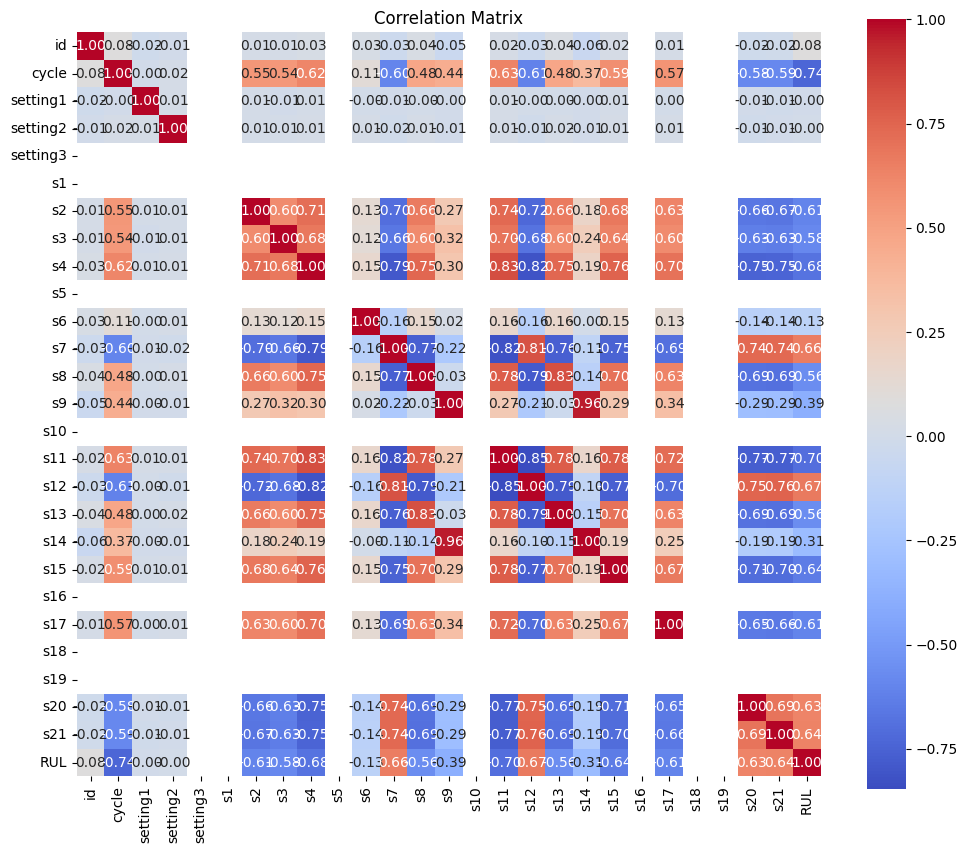

In [11]:
plot_correlation_matrix(train_df)

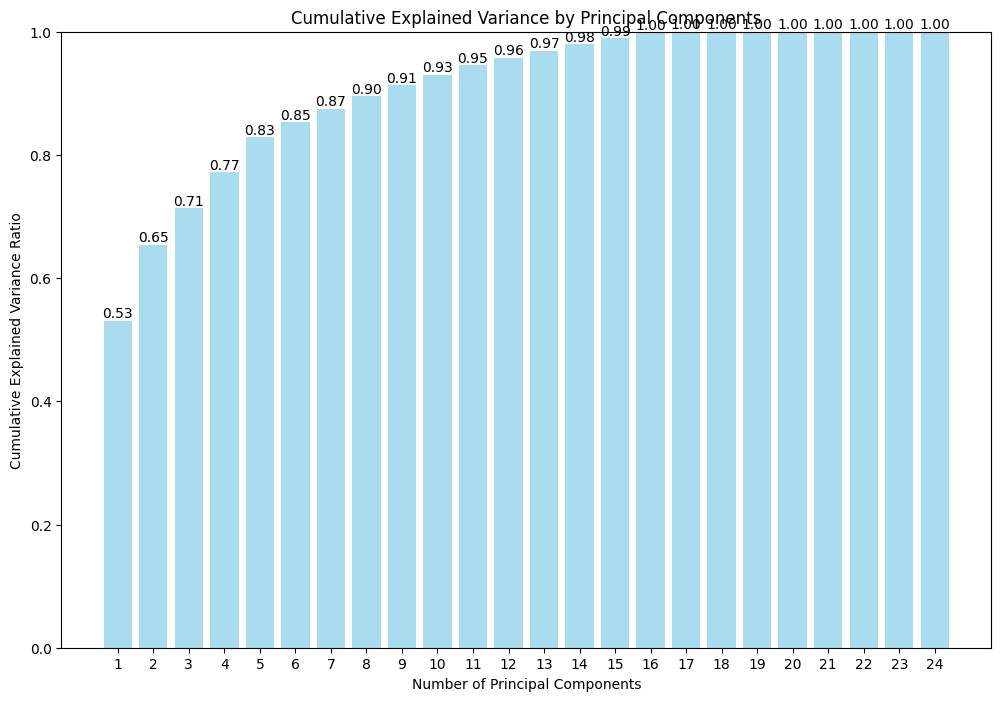

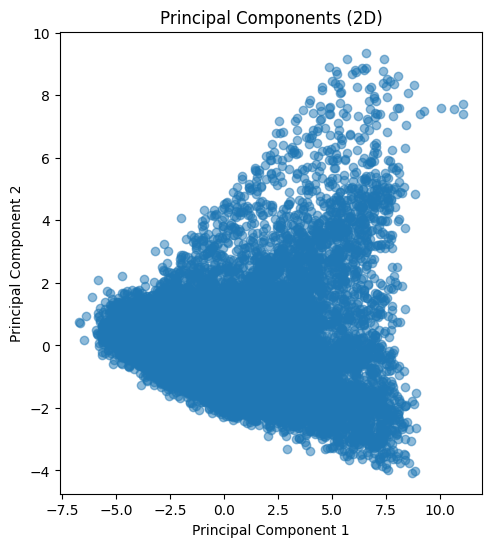

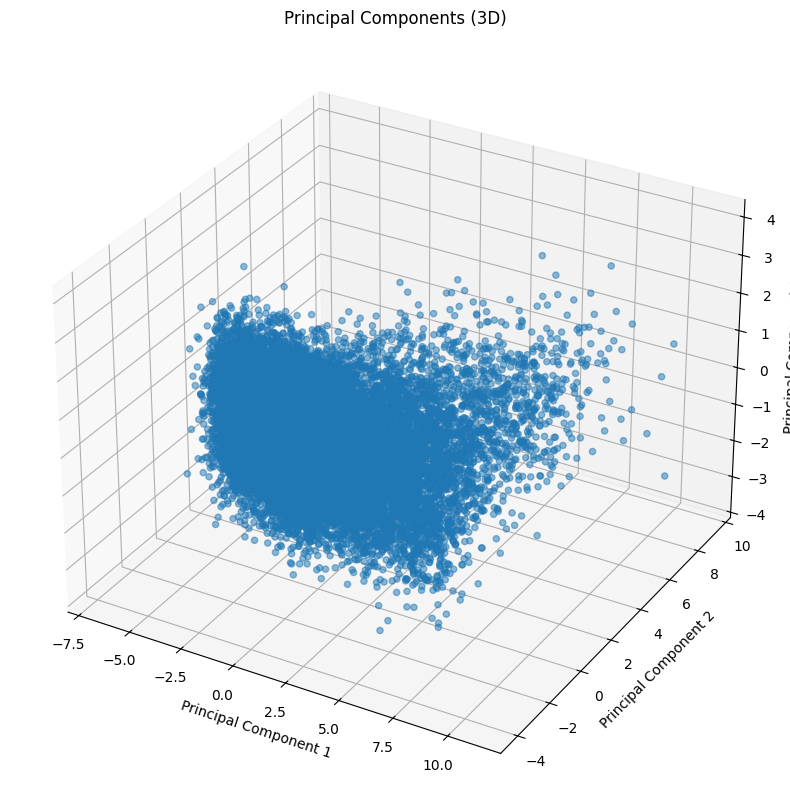

In [12]:
columns_to_use = [
    'setting1', 'setting2', 'setting3', 's1', 's2', 's3', 's4', 's5', 's6', 's7', 
    's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21'
]
perform_pca_and_plot(train_df, columns_to_use)

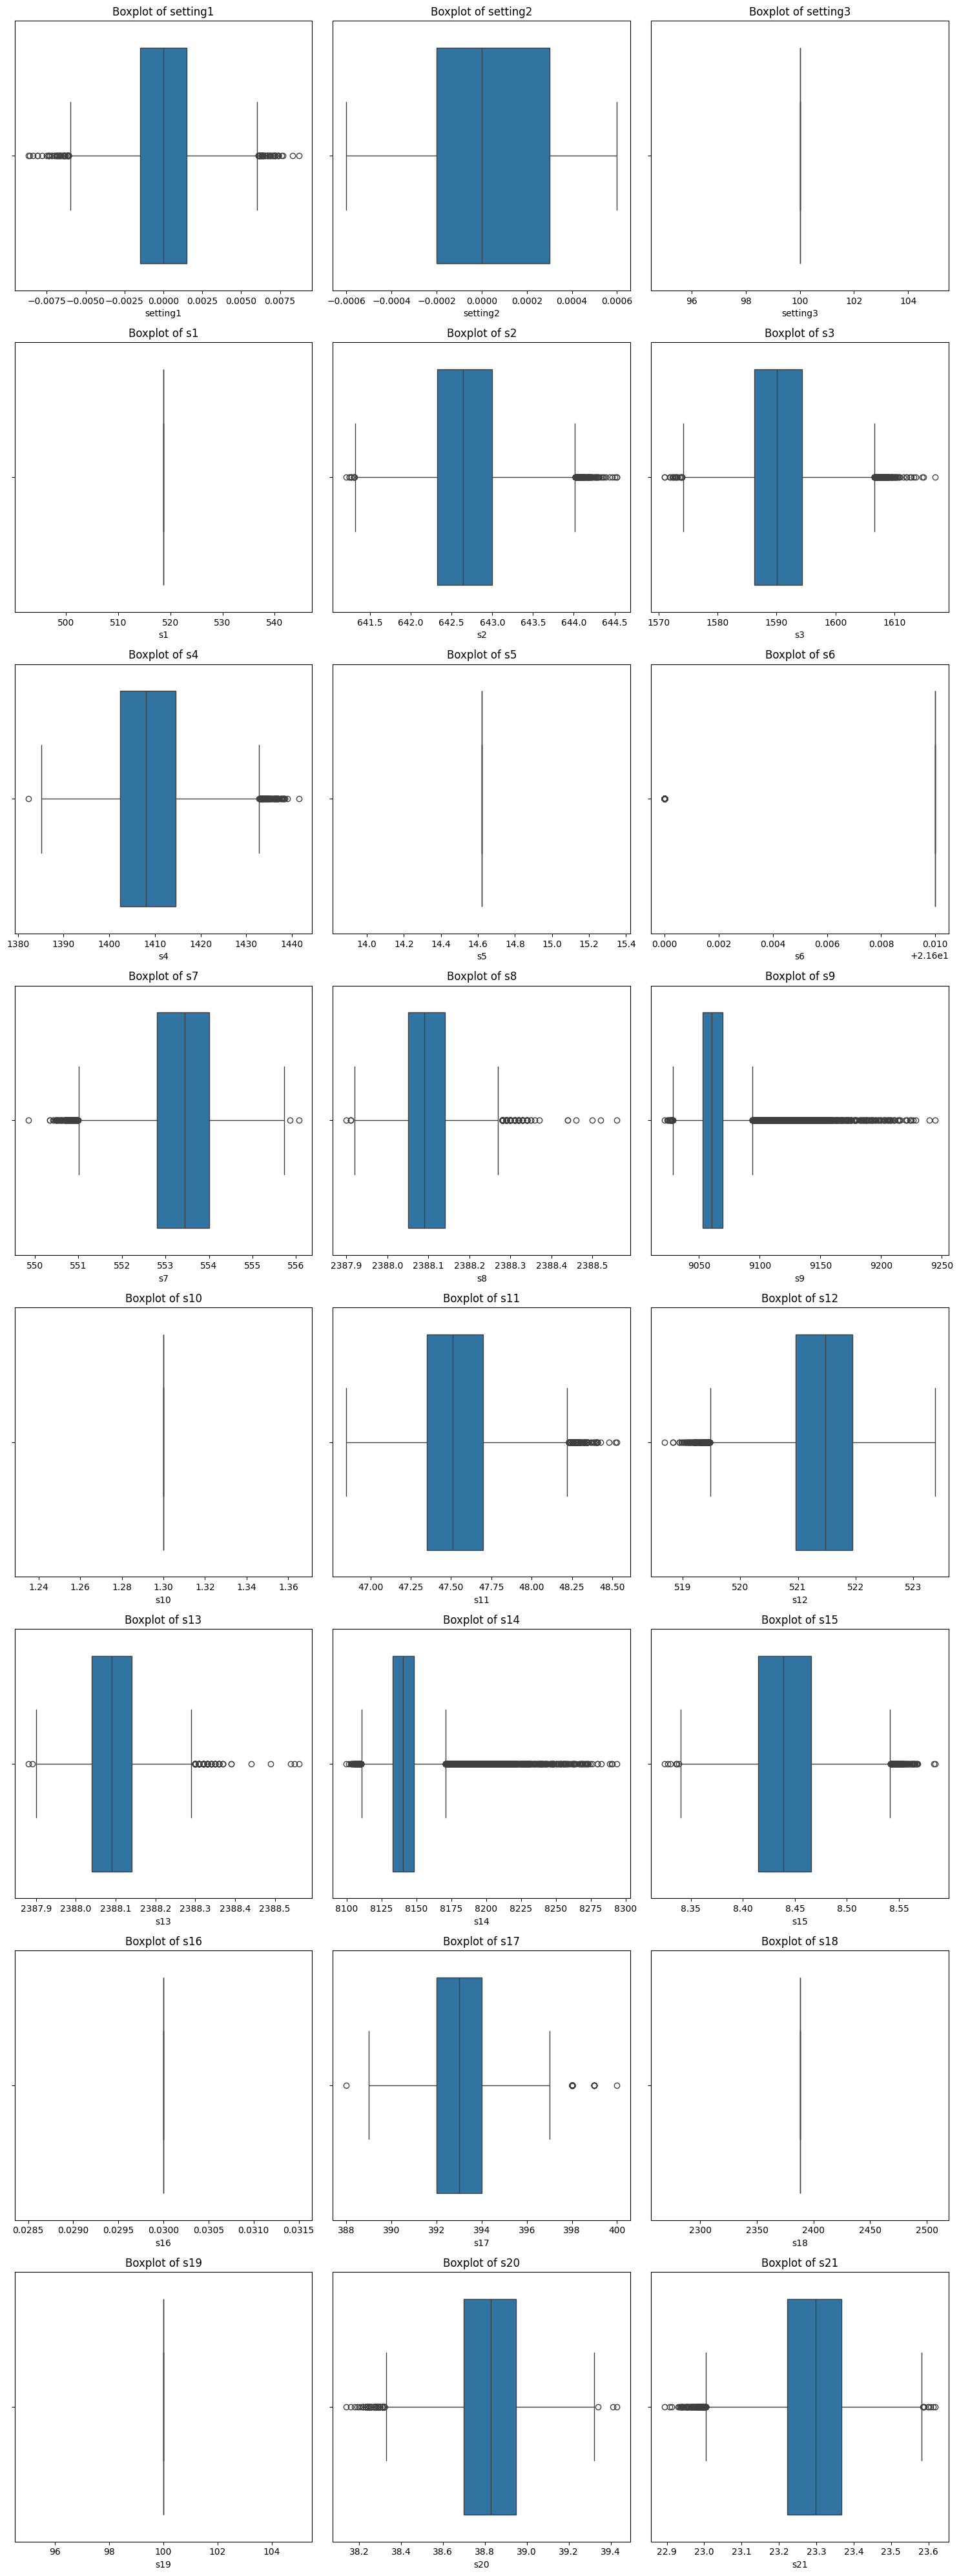

In [14]:
plot_boxplots(train_df, columns_to_use, n_cols_per_row=3)

In [15]:
# Example usage:
outliers_summary = detect_and_quantify_outliers(train_df, columns_to_use)
print(outliers_summary)

      Column  Number of Outliers  Lower Bound  Upper Bound
0   setting1                 105     -0.00600      0.00600
1   setting2                   0     -0.00095      0.00105
2   setting3                   0    100.00000    100.00000
3         s1                   0    518.67000    518.67000
4         s2                 128    641.31250    644.01250
5         s3                 165   1574.08000   1606.56000
6         s4                 120   1384.06750   1432.84750
7         s5                   0     14.62000     14.62000
8         s6                 406     21.61000     21.61000
9         s7                 110    551.01000    555.81000
10        s8                 320   2387.91500   2388.27500
11        s9                1686   9028.62000   9093.90000
12       s10                   0      1.30000      1.30000
13       s11                 167     46.82500     48.22500
14       s12                 146    519.47500    523.43500
15       s13                 161   2387.89000   2388.290

In [16]:
aggregated_df = group_and_aggregate(train_df, 'id', columns_to_use)
print(aggregated_df)

     id  setting1_calculate_mode  setting1_calculate_median  \
0     1                  -0.0006                    0.00000   
1     2                  -0.0004                    0.00000   
2     3                  -0.0010                    0.00010   
3     4                  -0.0002                    0.00010   
4     5                   0.0002                    0.00020   
..  ...                      ...                        ...   
95   96                  -0.0004                   -0.00010   
96   97                  -0.0001                    0.00000   
97   98                   0.0003                    0.00020   
98   99                   0.0004                   -0.00010   
99  100                  -0.0011                   -0.00015   

    setting1_calculate_mean  setting1_calculate_std  setting1_calculate_min  \
0                 -0.000189                0.001953                 -0.0067   
1                  0.000051                0.002320                 -0.0068   
2     

Check now how different motors beahave previously to failure, so whenever RUl is coming close to 0

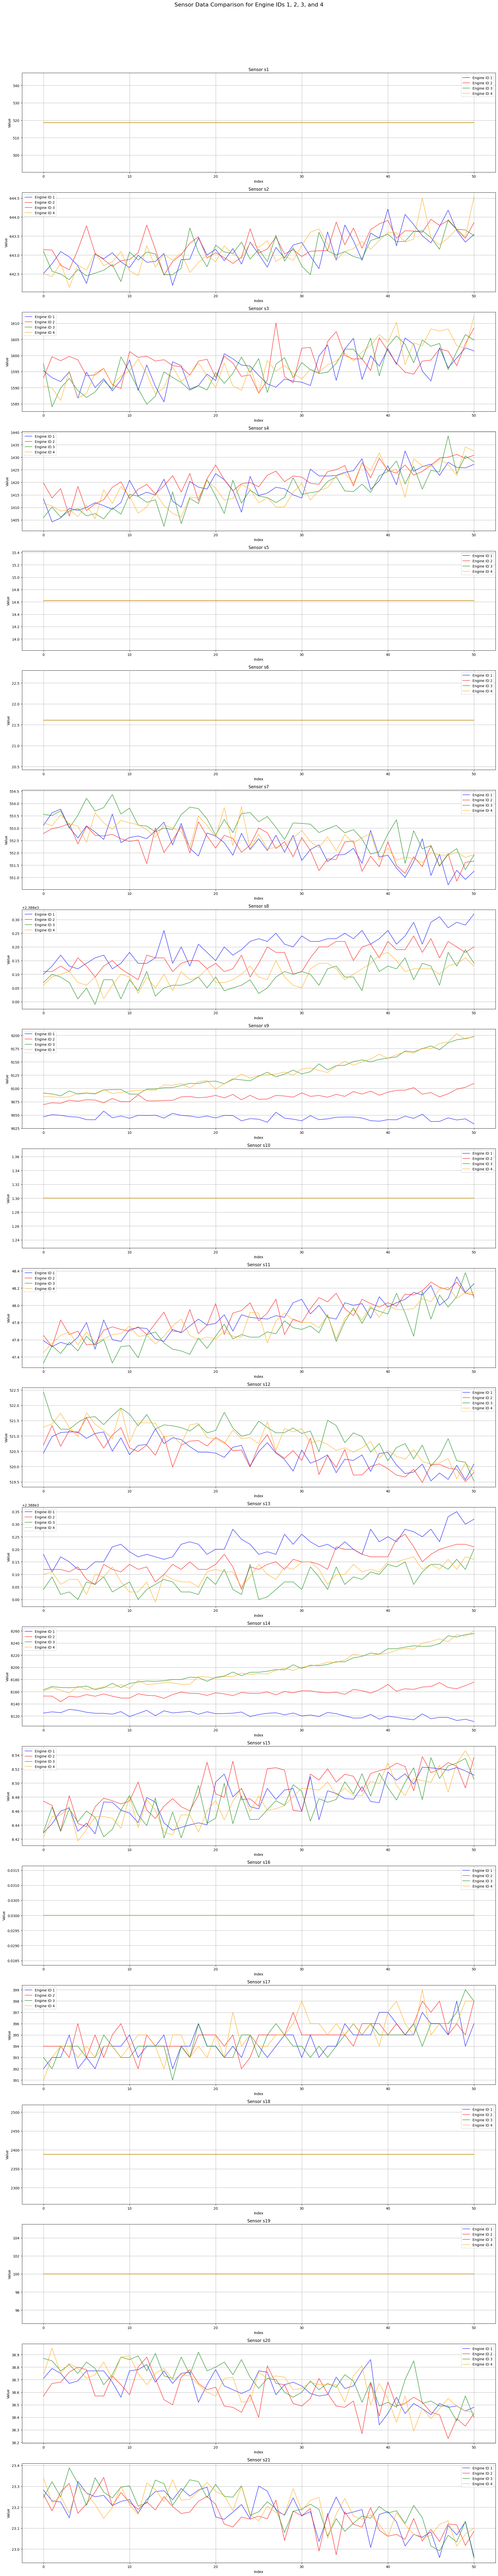

In [17]:
cols = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
plot_sensor_comparison_aligned_four_ids(train_df, engine_id1=1, engine_id2=2, engine_id3=3, engine_id4=4, cols=cols, sequence_length=50)


For more data exploration and seeing posible problems with our data set we are going to display an aplication for the user to see our data more visually and to let him analyze the data more easily without coding

In [19]:


#view the data analysis result inside your editor 
dtale.show(train_df)

# open the analysis in browser
dtale.show(train_df).open_browser()